## Homework 02

### Exercise 1
One half percent of the population has a coronavirus and a test is being developed. This test gives a false positive $3\%$ of the time and a false negative $2\%$ of the time. 

1. Find the probability that Luca is positive to the test.
2. Suppose Luca is positive to the test. What is the probability that he has contracted the disease?

**Solution**:

Consider two random variables: 
* $v=0,1$, that is a binary variable that tells whether a person has coronavirus ($v=1$) or not ($v=0$). From the description of the problem I know that 

$$ p(v=1) = 0.005 \space \text{and} \space p(v=0) = 1-0.005= 0.995 $$.
* $t=0,1$, that is a binary variable that tells when a person results positive ($t=1$) or negative ($t=0$).

The test has a false positive rate of $3\%$, so in terms of conditional probabilities $p(t|v=0)$ it is

$$ p(t=1 | v= 0) = 0.03  \space \text{and} \space p(t=0 | v= 0) = 1-0.03 = 0.97. $$

On the other hand, the test has a false negative rate of $2\%$, so in terms of conditional probabilities $p(t|v=1)$ it is

$$ p(t=0 | v= 1) = 0.02  \space \text{and} \space p(t=1 | v= 1) = 1-0.02 = 0.98. $$


1. In order to know the probability that Luca is positive to the test I can use the [Law of total proabibilty](https://en.wikipedia.org/wiki/Law_of_total_probability) that relates marginal probability $p(t)$ to conditionals $p(t|v)$:

$$ p(t=1) = \sum_{v\in V} p(t=1|v)p(v) = p(t=1|v=0)p(v=0) + p(t=1|v=1)p(v=1)  $$

In [8]:
# p(v)
p_virus_yes = 0.005
p_virus_no = 1-p_virus_yes

#p(t|v=0)
p_test_yes_virus_no = 0.03
p_test_no_virus_no = 1 - p_test_yes_virus_no

#p(t|v=1)
p_test_no_virus_yes = 0.02
p_test_yes_virus_yes = 1-0.02

#p(t=1)
p_test_yes = (p_test_yes_virus_no*p_virus_no) + (p_test_yes_virus_yes*p_virus_yes)

print("Luca has a probability to be positive of", round(p_test_yes,3))

Luca has a probability to be positive of 0.035


2. If Luca discovers that he has been positive to the test ($t=1$) for knowing his probability that he has contracted the disease I can use the [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) 

$$ p(v=1 | t=1) = \frac{p(t=1|v=1)p(v=1)}{p(t=1)}$$

In [9]:
#p(v=1 | t=1)

p_virus_yes_test_yes = (p_test_yes_virus_yes*p_virus_yes)/(p_test_yes)

print("Having been positive to the test, Luca has a probability to have coronavirus of", round(p_virus_yes_test_yes,3))

Having been positive to the test, Luca has a probability to have coronavirus of 0.141


### Exercise 2

Implement the empirical cumulative distribution function $F_X(x)=$ `cdf(dist, x)` taking as inputs a `pyro.distributions` object `dist`, corresponding to the distribution of $X$, and a real value `x`.


Suppose that $X\sim \mathcal{N}(0,1)$ and plot $F_X(x=1)$.

In [10]:
#LIBRARIES
import pyro
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
def cdf(dist, x):
    y = [pyro.sample("sample", dist) for i in range(5000)]
    n = len(y)
    y_x = [y[i] for i in range(n) if y[i]<x]
    return (len(y_x))/(n)

F(X=1) =  0.825


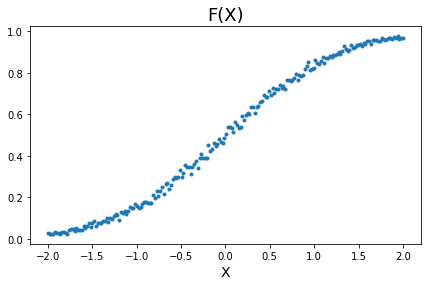

In [12]:
x = np.linspace(-2,2,200)

y = []

for t in x:
    y.append(cdf(pyro.distributions.Normal(0,1), t))

fig = plt.figure(figsize=(7,4))
_ = plt.plot(x, y, '.')
_ = plt.title("F(X)", fontsize=18)
_ = plt.xlabel("X", fontsize=14)
print("F(X=1) = ", cdf(pyro.distributions.Normal(0,1), 1))

### Exercise 3

Suppose the heights of male students are normally distributed with mean $180$ and unknown variance $\sigma^2$. Suppose that $\sigma^2$ is in the range $[22,41]$ with approximately $95\%$ probability and assign to $\sigma^2$ an inverse-gamma $IG(38,1110)$ prior distribution .

1. Empirically verify that the parameters of the inverse-gamma distribution lead to a prior probability of approximately $95\%$ that  $\sigma^2\in[22,41]$.
2. Derive the posterior density of $\sigma^2$ corresponding to the following data: $183, 173, 181, 170, 176, 180, 187, 176, 171, 190, 184, 173, 176, 179, 181, 186$.
Then plot it together with the prior density.
3. Compute the posterior density of the standard deviation $\sigma$.

**Solution**:
1. To verify that we recall the definition of cumulative distribution function (```cdf```) $F(x)$ that is 

    $$ F(x) = \int_{-\infty}^{x} dx \space f(x), $$
    where $f(x)$ is the probability density function.

    So if $\sigma^2$ is in the range $[22,41]$ with approximately $95\%$ probability and it is distributed as an  inverse-gamma $IG(\alpha=38,\beta=1110)$ I conclude that 

    $$P(\sigma^2 \in [22,41]) = 0.95 = \int_{22}^{41} d\sigma^2 f_{IG}(\sigma^2;38,110) = F_{IG}(\sigma^2=41; 38,110)-F_{IG}(\sigma^2=22; 38,110) $$
    
    Since in **Exercise 2** I implemented an empirical ```cdf``` function, let's see if this is correct

In [20]:
dist = pyro.distributions.inverse_gamma.InverseGamma(38,1110)

a=22
b=41

print("P(sigma^2 in [",a,",",b,"]) = ", cdf(dist,b)-cdf(dist,a))


P(sigma^2 in [ 22 , 41 ]) =  0.9454


2. Defining $\mathbf{x}$ as the vector that contains the heights of male students, the posterior density of $\sigma^2$ can be derived by Bayes' Theorem 

    $$ p(\sigma^2| \mathbf{x}) = \frac{p(\mathbf{x}|\sigma^2)p(\sigma^2)}{p(\mathbf{x})}, $$

    where 

    $$ p(\mathbf{x}|\sigma^2) = \prod_{i=0}^{N}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}} $$

    $$ p(\sigma^2) = \frac{\beta^\alpha}{\Gamma(\alpha)} \frac{e^{-\frac{\beta}{\sigma^2}}}{(\sigma^2)^{\alpha + 1}}. $$

    Using these pdf in the posterior function I have

    $$ p(\sigma^2| \mathbf{x}) = \frac{1}{p(\mathbf{x})} \Biggl( \prod_{i=0}^{N}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_i-\mu)^2}{2\sigma^2}} \Biggr) \cdot \Biggl( \frac{\beta^\alpha}{\Gamma(\alpha)} \frac{e^{-\frac{\beta}{\sigma^2}}}{(\sigma^2)^{\alpha + 1}} \Biggr) =  \frac{1}{p(\mathbf{x})} \Biggl( \frac{1}{{(2\pi\sigma^2)^{N/2}}}e^{-\frac{\sum_i (x_i-\mu)^2}{2\sigma^2}} \Biggr)   \cdot \Biggl( \frac{\beta^\alpha}{\Gamma(\alpha)} \frac{e^{-\frac{\beta}{\sigma^2}}}{(\sigma^2)^{\alpha + 1}} \Biggr)    \\
p(\sigma^2| \mathbf{x}) = \frac{\beta^\alpha}{(2\pi)^{N/2}p(\mathbf{x})\Gamma(\alpha)} \Biggl[ \frac{1}{(\sigma^2)^{N/2+\alpha+1}}  e^{-\frac{1}{\sigma^2} \Bigl(\beta + \frac{\sum_i (x-\mu)^2}{2} \Bigr)} \Biggr] $$

    Thus, defining $\alpha' := N/2+\alpha $ and $ \beta' := \beta + \frac{\sum_i (x-\mu)^2}{2}$ I observe that up to normalization costants

    $$  p(\sigma^2| \mathbf{x}) \propto \frac{1}{(\sigma^2)^{\alpha'+1}}  e^{-\frac{\beta'}{\sigma^2}} $$

    the posterior of $\sigma^2$ is an inverse Gamma distribution IG($\alpha'$,$\beta'$).

    In order to plot this distribution and its conjugate prior I use now their relative ```pyro``` distribution for taking samples and put them in a histogram

In [21]:
data = np.array([183,173,181,170,176,180,187,176,171,190,184,173,176,179,181,186])
mu = 180
N = len(data)

prior = pyro.distributions.inverse_gamma.InverseGamma(38,1110)

alpha_prime = 38 + (N/2)
beta_prime = 1110 + (np.sum((data-mu)**2)/2)

posterior = pyro.distributions.inverse_gamma.InverseGamma(alpha_prime,beta_prime)

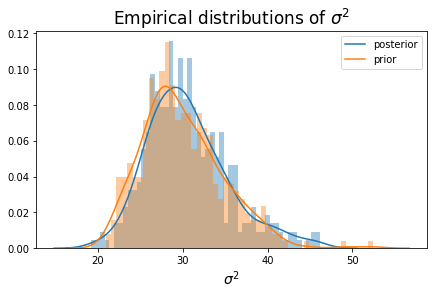

In [23]:
fig = plt.figure(figsize=(7,4))

sigma_prior = [pyro.sample("sample_prior", prior) for i in range(400)]
sigma_post = [pyro.sample("sample_post", posterior) for i in range(400)]


_=sns.distplot(sigma_post, bins=50, kde_kws={"label": "posterior"})
_=sns.distplot(sigma_prior, bins=50,  kde_kws={"label": "prior"})
_=plt.title("Empirical distributions of $\sigma^2$", fontsize=17)
_=plt.xlabel("$\sigma^2$", fontsize=14)

3. In order to compute the posterior density of the standard deviation $\sigma$ we can still use the posterior density of $\sigma^2$ accordig to this trasformation rule

    $$ f_y(y) = f_x(g^{-1}(y)) \space \Bigl| \frac{dx}{dy} \Bigr| $$
    
    In this case $y = \sigma$ and $x=\sigma^2$:
    
    $$p(\sigma | \mathbf{x} ) = 2\sigma p(\sigma^2 | \mathbf{x}) = 2\sigma \frac{{\beta'}^{\alpha'}}{\Gamma(\alpha')} \frac{e^{-\frac{\beta'}{\sigma^2}}}{(\sigma^2)^{\alpha' + 1}}$$
    
    As did before, in order to plot the distribution I use  its relative ```pyro``` distribution for taking a sample and put them in a histogram

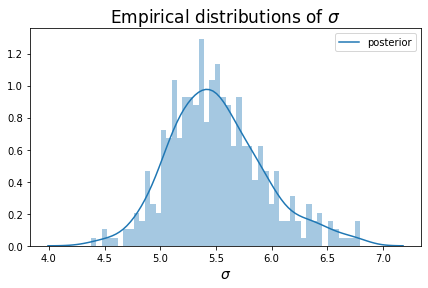

In [24]:
ig = plt.figure(figsize=(7,4))
sd_post = np.sqrt(sigma_post)

_=plt.title("Empirical distributions of $\sigma$", fontsize=17)
_=plt.xlabel("$\sigma$", fontsize=14)
_=sns.distplot(sd_post, bins=50, kde_kws={"label": "posterior"})

### Exercise 4

Prove that the Gamma distribution is the conjugate prior distribution for the Exponential likelihood. 

**Solution**:

Consider $\mathbf{x} = (x_1, x_2, ..., x_n)$ our dataset. From hypothesis I know that the likelihood of this values is distributed exponentially and its parameter $\theta$ is distriuted as a Gamma: 

$$ p(\mathbf{x} | \theta ) = \prod_{i=0}^{n} \theta e^{-\theta x_i},  \space p(\theta) = \frac{\beta^{\alpha}\theta^{\alpha-1} e^{-\beta \theta}}{\Gamma(\alpha)}$$

Then, the posterior distribution will be 

$$ p(\theta |\mathbf{x}) = \frac{1}{p(\mathbf{x})} \Biggl[  \prod_{i=0}^{n} \theta e^{-\theta x_i} \Biggr] \Biggl[ \frac{\beta^{\alpha}\theta^{\alpha-1} e^{-\beta \theta}}{\Gamma(\alpha)} \Biggr] = \frac{1}{p(\mathbf{x})} \Biggl[ \theta^n e^{-\theta \sum_{i=1}^n x_i} \Biggr] \Biggl[ \frac{\beta^{\alpha}\theta^{\alpha-1} e^{-\beta \theta}}{\Gamma(\alpha)} \Biggr] = \frac{\beta^{\alpha}}{p(\mathbf{x})\Gamma(\alpha)} \Biggl( \theta^{(\alpha + n) -1} e^{-\theta(\beta+n\bar{x})} \Biggr),    $$

so $\theta |\mathbf{x} \sim \text{Gamma}(\alpha+n, \beta+n\bar{x})$, where $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$. Thus the Gamma prior is conjugate to the Exponential likelihood distribution.